# My Stocks Project 


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2022, 1, 1)

In [8]:
# AMD
AMD = data.DataReader("AMD", 'yahoo', start, end)

# TD Bank
TD = data.DataReader("TD", 'yahoo', start, end)

# Costco
COST = data.DataReader("COST", 'yahoo', start, end)

# John Deere
DE = data.DataReader("DE", 'yahoo', start, end)

# Lockheed Martin
LMT = data.DataReader("LMT", 'yahoo', start, end)

# NVIDIA
NVDA = data.DataReader("NVDA", 'yahoo', start, end)


In [9]:
# Could also do this for a Panel Object
df = data.DataReader(['AMD', 'TD', 'COST', 'DE', 'LMT', 'NVDA'],'yahoo', start, end)

In [10]:
tickers = ['AMD', 'TD', 'COST', 'DE', 'LMT', 'NVDA']

** Using pd.concat to concatenate the stock dataframes together to a single data frame called my_stocks**

In [11]:
my_stocks = pd.concat([AMD,TD,COST,DE,LMT,NVDA], axis=1, keys=tickers)

** Set the column name levels **

In [12]:
my_stocks.columns.names = ['Tickers','Stock Info']

** Checking the head **

In [13]:
my_stocks.head()

Tickers      AMD                                               TD             \
Stock Info  High   Low  Open Close    Volume Adj Close       High        Low   
Date                                                                           
2012-01-03  5.59  5.44  5.53  5.48  12675100      5.48  38.080002  37.514999   
2012-01-04  5.49  5.41  5.47  5.46   8034900      5.46  37.889999  37.500000   
2012-01-05  5.57  5.35  5.45  5.46  11476900      5.46  37.705002  37.125000   
2012-01-06  5.52  5.39  5.44  5.43  12938600      5.43  37.555000  37.035000   
2012-01-09  5.60  5.38  5.42  5.59  12585400      5.59  37.544998  37.005001   

Tickers                           ...        LMT                        \
Stock Info       Open      Close  ...       Open      Close     Volume   
Date                              ...                                    
2012-01-03  37.709999  37.810001  ...  82.120003  82.019997  2273600.0   
2012-01-04  37.650002  37.790001  ...  80.949997  80.910004  2242700.0   
2012-01-05  37.590000  37.590000  ...  80.660004  80.070000  2616100.0   
2012-01-06  37.455002  37.224998  ...  80.410004  79.980003  4274300.0   
2012-01-09  37.279999  37.509998  ...  80.349998  80.040001  1861500.0   

Tickers                  NVDA                                                
Stock Info  Adj Close    High     Low    Open   Close      Volume Adj Close  
Date                                                                         
2012-01-03  58.569984  3.6000  3.5025  3.5750  3.5100  46804400.0  3.221310  
2012-01-04  57.777363  3.5650  3.4800  3.5125  3.5500  34737200.0  3.258020  
2012-01-05  57.177536  3.6950  3.5175  3.5325  3.6775  56354800.0  3.375035  
2012-01-06  57.113255  3.6775  3.5925  3.6750  3.6350  53325200.0  3.336029  
2012-01-09  57.156113  3.7050  3.6100  3.6375  3.6350  50824400.0  3.336029  

[5 rows x 36 columns]

** the max Close price for each stock **

In [14]:
my_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Tickers
AMD     161.910004
TD       76.680000
COST    567.770020
DE      394.220001
LMT     439.850006
NVDA    333.760010
dtype: float64

In [15]:
returns = pd.DataFrame()

** using pct.change from pandas to get the return value **

In [16]:
for tick in tickers:
    returns[tick+' Return'] = my_stocks[tick]['Close'].pct_change()
returns.head()

,AMD Return,TD Return,COST Return,DE Return,LMT Return,NVDA Return
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,-0.003650,-0.000529,-0.006265,0.014626,-0.013533,0.011396
2012-01-05,0.000000,-0.005292,-0.009635,0.014540,-0.010382,0.035916
2012-01-06,-0.005495,-0.009710,-0.025583,0.008084,-0.001124,-0.011557
2012-01-09,0.029466,0.007656,-0.026131,0.005225,0.000750,0.000000


** pairplot of the returns dataframe **

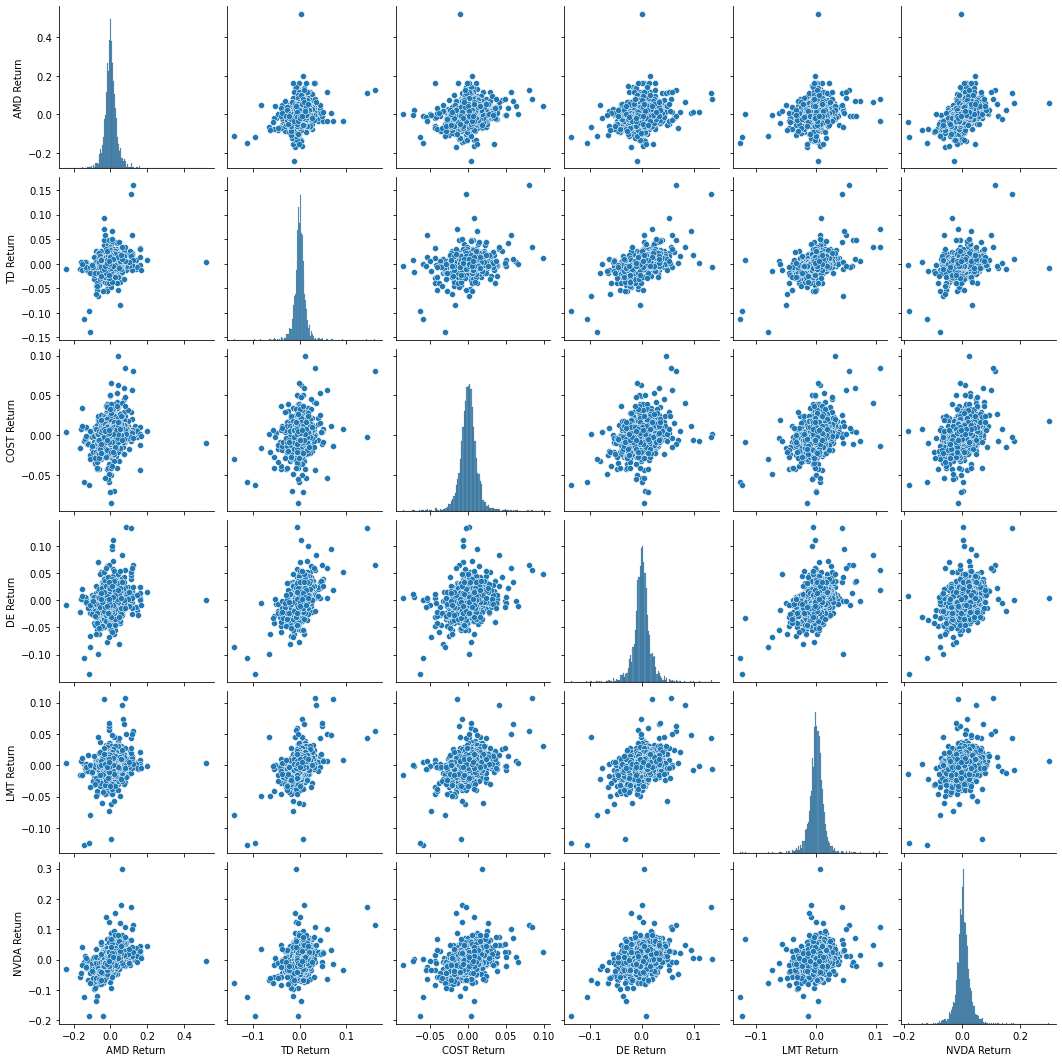

In [17]:
import seaborn as sns
sns.pairplot(returns[1:])

** what dates each bank stock had the best and worst single day returns? **

In [18]:
returns.idxmin()

AMD Return    2017-05-02
TD Return     2020-03-09
COST Return   2018-12-14
DE Return     2020-03-16
LMT Return    2020-03-12
NVDA Return   2018-11-16
dtype: datetime64[ns]

In [19]:
returns.idxmax()

AMD Return    2016-04-22
TD Return     2020-03-13
COST Return   2020-03-02
DE Return     2016-08-19
LMT Return    2020-03-17
NVDA Return   2016-11-11
dtype: datetime64[ns]

** Evaluating risk of each stock based on standard devation **

In [20]:
returns.std()

AMD Return     0.036333
TD Return      0.012836
COST Return    0.012150
DE Return      0.016908
LMT Return     0.013269
NVDA Return    0.025689
dtype: float64

In [28]:
returns.loc['2021-01-01':'2021-12-31'].std()

AMD Return     0.026791
TD Return      0.010753
COST Return    0.011915
DE Return      0.018840
LMT Return     0.012598
NVDA Return    0.028337
dtype: float64

** distplot of the 2021 returns for TD **

C:\Users\arian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TD Return', ylabel='Density'>

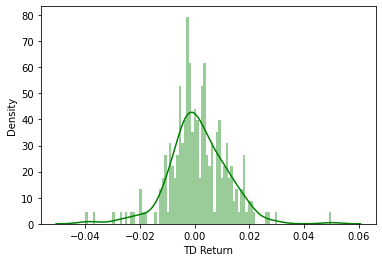

In [29]:
sns.distplot(returns.loc['2021-01-01':'2021-12-31']['TD Return'],color='green',bins=100)

** distplot of the 2021 returns for AMD **

C:\Users\arian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMD Return', ylabel='Density'>

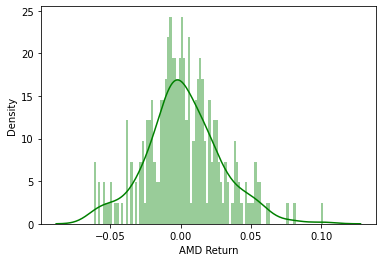

In [30]:
sns.distplot(returns.loc['2021-01-01':'2021-12-31']['AMD Return'],color='green',bins=100)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

** line plot showing Close price for each stock for the entire index of time **

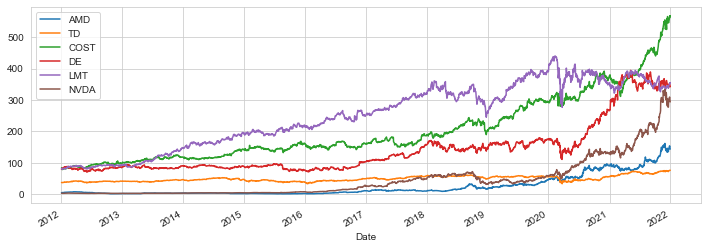

In [33]:
for tick in tickers:
    my_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

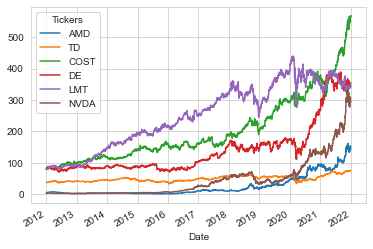

In [34]:
my_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [35]:
my_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

AttributeError: 'DataFrame' object has no attribute 'iplot'

** rolling 30 day average against the Close Price for DE between 2020-2022 **

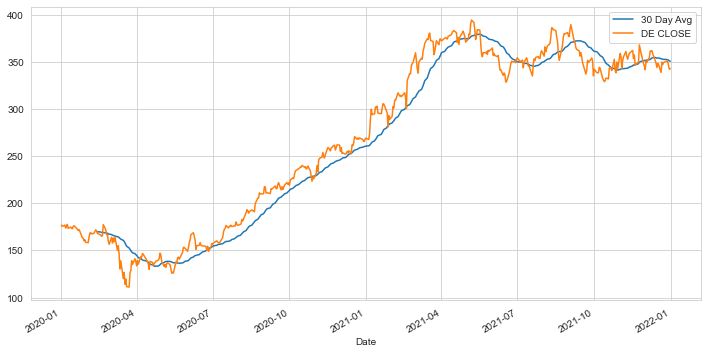

In [37]:
plt.figure(figsize=(12,6))
DE['Close'].loc['2020-01-01':'2022-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
DE['Close'].loc['2020-01-01':'2022-01-01'].plot(label='DE CLOSE')
plt.legend()

** heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Tickers', ylabel='Tickers'>

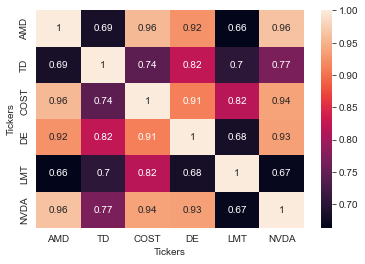

In [38]:
sns.heatmap(my_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** clustermap of the correlations **

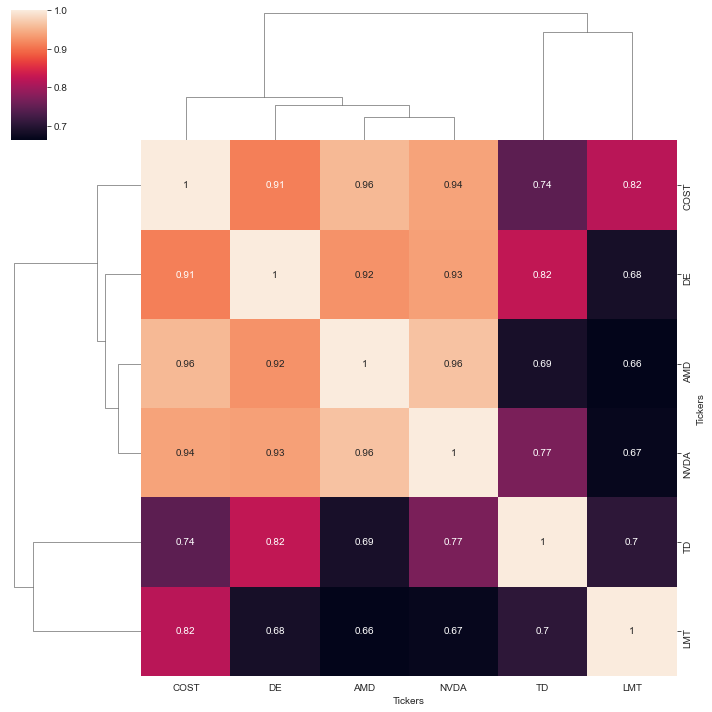

In [39]:
sns.clustermap(my_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [1]:
close_corr = my_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

NameError: name 'my_stocks' is not defined